In [1]:
from src import Modeler, Processor, Reader
import pandas as pd
from datetime import datetime
from sklearn import metrics, model_selection, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
# Using the US Census regions from here: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
south_atlantic_states = [
    10   # Delaware
    , 11 # DC
    , 12 # Florida
    , 13 # Georgia
    , 24 # Maryland
    , 37 # North Carolina
    , 45 # South Carolina
    , 51 # Virginia
    , 54 # West Virginia
]
state_filter = south_atlantic_states

In [3]:
state_dict = {
    'code' : ['10', '11', '12', '13', '24', '37', '45', '51', '54']
    , 'state_name' : ['Delware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
}

state_code_map = pd.DataFrame(data=state_dict)

## testing lag logic

In [4]:
cd_reader = Reader.CasesAndDeathsReader()

In [5]:
cd_df = cd_reader.read_and_process_data(state_filter=state_filter)

In [6]:
cd_df.head()

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
0,10001,2020-03-18,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,10001,2020-03-19,4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001,2020-03-20,4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10001,2020-03-21,5,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10001,2020-03-22,5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Instantiate preprocessor
#preprocessor = Processor.PreProcessor(state_filter=state_filter)

In [8]:
#preprocessor.load_processed_data_without_fips_as_columns()

In [9]:
#df = preprocessor.get_current_data()

In [10]:
#df.head()

In [11]:
# cd_df = df[['date'
#             , 'FIPS'
#             , 'cases'
#             , 'deaths'
#             , 'previous_day_cases'
#             , 'previous_day_deaths'
#             , 'new_cases'
#             , 'new_deaths'
#             , 'smoothed_new_cases'
#             , 'smoothed_new_deaths'
#             , '8_days_prior_cases'
#             , '9_days_prior_cases'
#             , '10_days_prior_cases'
#             , '8_days_prior_deaths'
#             , '9_days_prior_deaths'
#             , '10_days_prior_deaths'
#            ]]
# #cd_df.head()

In [12]:
cd_only_md = cd_df[cd_df['FIPS'].apply(lambda x: x[:2] == '11')]
#cd_only_md = cd_df[cd_df['FIPS'].isin(['24029', '24031', '24033', '24035'])]

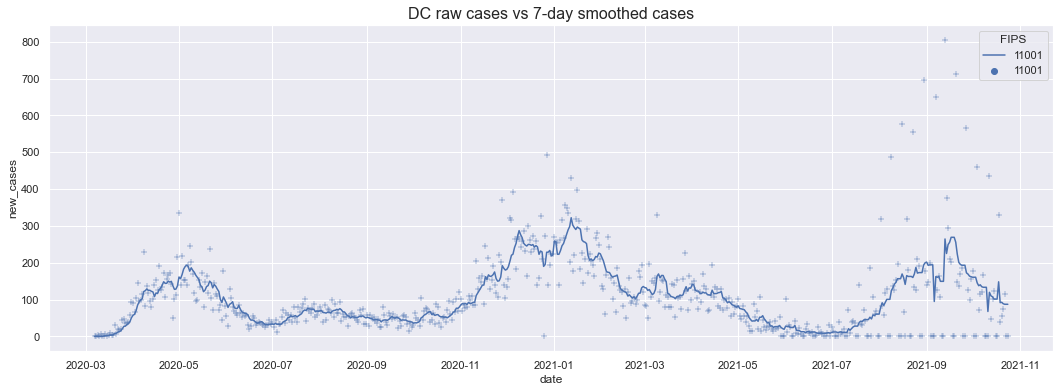

In [13]:

plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_cases', data=cd_only_md, hue='FIPS', marker='+');
sns.lineplot(x='date', y='smoothed_new_cases', data=cd_only_md, hue='FIPS');
plt.title('DC raw cases vs 7-day smoothed cases', fontsize=16);
plt.show()


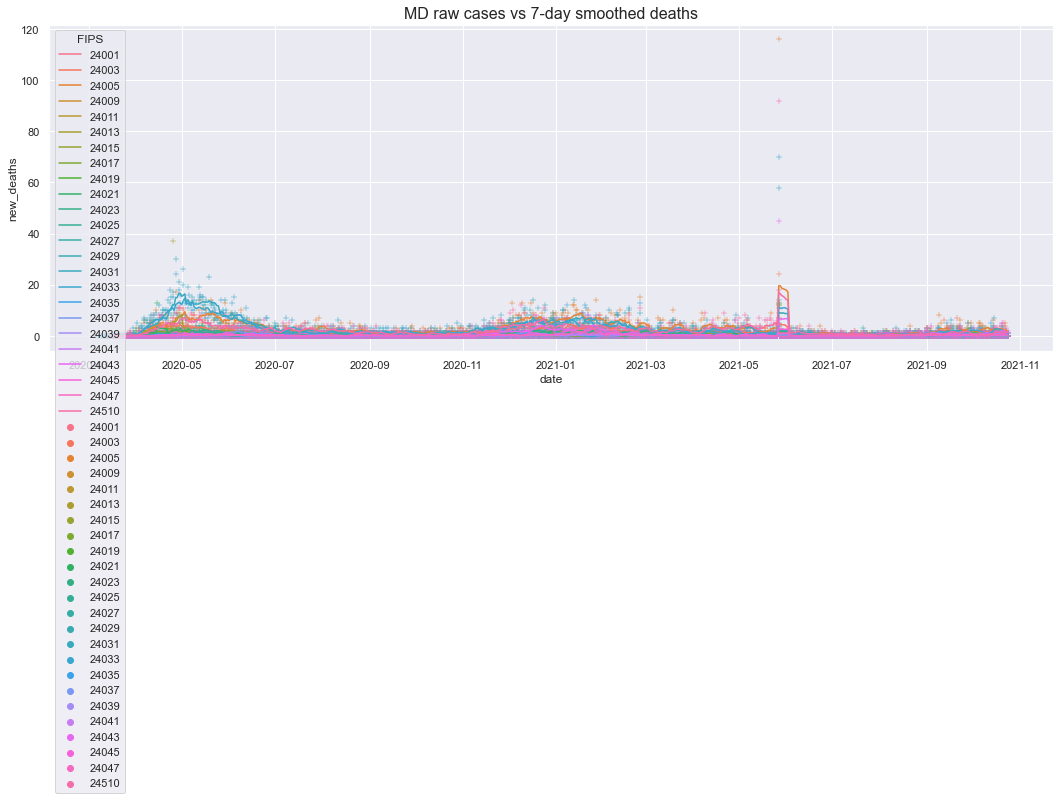

In [21]:
cd_only_md = cd_df[(cd_df['FIPS'].apply(lambda x: x[:2] == '24'))]
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', data=cd_only_md, hue='FIPS', marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths', data=cd_only_md, hue='FIPS');
plt.title('MD raw cases vs 7-day smoothed deaths', fontsize=16);
plt.show()


In [22]:
date_mask = (cd_df['date'] > '2021-05-24') & (cd_df['date'] < '2021-05-30')
cd_only_md[date_mask & (cd_only_md['FIPS'] == '24005')][['FIPS','date', 'deaths', 'previous_day_deaths', 'new_deaths', 'smoothed_new_deaths']].head(20)

<ipython-input-22-b714c8cc1980>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cd_only_md[date_mask & (cd_only_md['FIPS'] == '24005')][['FIPS','date', 'deaths', 'previous_day_deaths', 'new_deaths', 'smoothed_new_deaths']].head(20)


,FIPS,date,deaths,previous_day_deaths,new_deaths,smoothed_new_deaths
135234,24005,2021-05-25,1532.0,1530.0,2.0,3.000000
135235,24005,2021-05-26,1537.0,1532.0,5.0,3.142857
135236,24005,2021-05-27,1653.0,1537.0,116.0,19.571429
135237,24005,2021-05-28,1655.0,1653.0,2.0,19.571429
135238,24005,2021-05-29,1657.0,1655.0,2.0,18.571429


In [15]:
cd_df[cd_df['FIPS'] == '24033'].head(50)

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
142422,24033,2020-03-09,1,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
142423,24033,2020-03-10,3,0.0,1.0,2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
142424,24033,2020-03-11,5,0.0,3.0,2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
142425,24033,2020-03-12,5,0.0,5.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
142426,24033,2020-03-13,7,0.0,5.0,2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
142427,24033,2020-03-14,7,0.0,7.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
142428,24033,2020-03-15,9,0.0,7.0,2.0,1.285714,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
142429,24033,2020-03-16,10,0.0,9.0,1.0,1.285714,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
142430,24033,2020-03-17,14,0.0,10.0,4.0,1.571429,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
142431,24033,2020-03-18,20,1.0,14.0,6.0,2.142857,0.000000,0.000000,0.000000,0.0,1.0,0.142857,0.000000,0.000000,0.000000


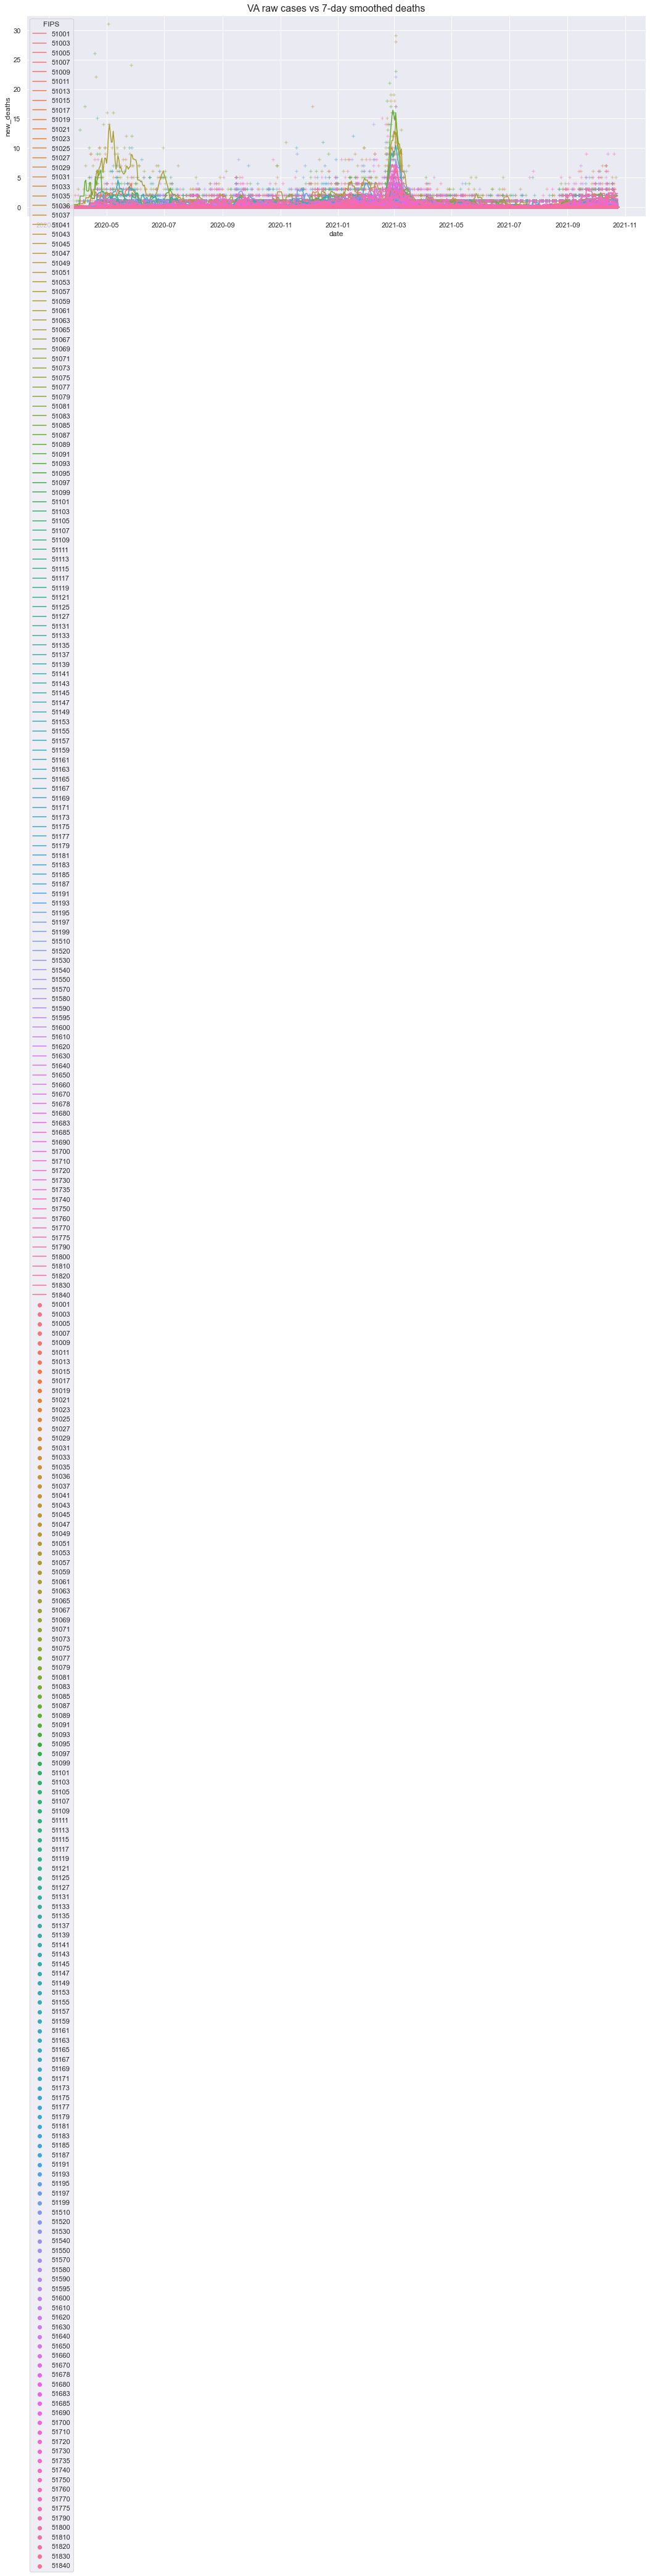

In [23]:
cd_only_va = cd_df[(cd_df['FIPS'].apply(lambda x: x[:2] == '51'))]
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', data=cd_only_va, hue='FIPS', marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths', data=cd_only_va, hue='FIPS');
plt.title('VA raw cases vs 7-day smoothed deaths', fontsize=16);
plt.show()


In [24]:
cd_only_va[cd_only_va['new_deaths'] > 25]

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
243945,51041,2021-03-03,23727,352.0,23654.0,73.0,68.857143,90.142857,95.000000,105.571429,324.0,28.0,12.714286,6.428571,4.571429,2.428571
248149,51059,2020-05-03,4340,184.0,4046.0,294.0,207.285714,158.857143,151.142857,141.000000,153.0,31.0,12.714286,7.571429,6.857143,6.571429
248453,51059,2021-03-03,67003,985.0,66825.0,178.0,183.571429,187.857143,193.142857,200.571429,956.0,29.0,15.000000,5.714286,4.285714,3.142857
256216,51087,2020-04-19,584,71.0,559.0,25.0,29.285714,27.714286,32.857143,33.142857,45.0,26.0,5.142857,2.714286,2.714286,4.571429


## Aggregating by state

In [29]:
cd_df.head()

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
0,10001,2020-03-18,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,10001,2020-03-19,4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001,2020-03-20,4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10001,2020-03-21,5,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10001,2020-03-22,5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
state_df = cd_df.copy()
state_df['STATE'] = state_df['FIPS'].apply(lambda x: x[:2])
state_df = state_df.drop(['FIPS'], axis=1).groupby(['date', 'STATE']).sum().reset_index()
state_df.head()

,date,STATE,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
0,2020-03-01,12,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-02,12,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-02,13,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-03,12,3,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-03,13,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


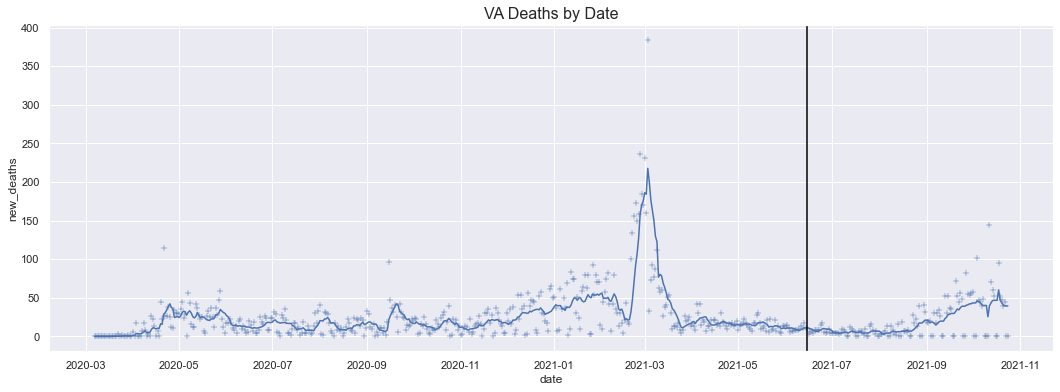

In [36]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', data=state_df[state_df['STATE'] == '51'], marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths', data=state_df[state_df['STATE'] == '51']);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'), color='black')
plt.title('VA Deaths by Date', fontsize=16);
plt.show()

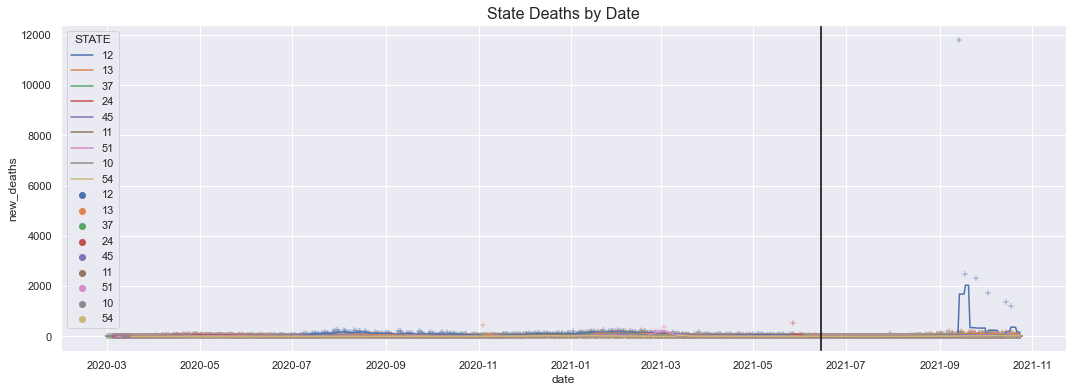

In [39]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', hue='STATE', data=state_df, marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths',hue='STATE', data=state_df);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'), color='black')
plt.title('State Deaths by Date', fontsize=16);
plt.show()

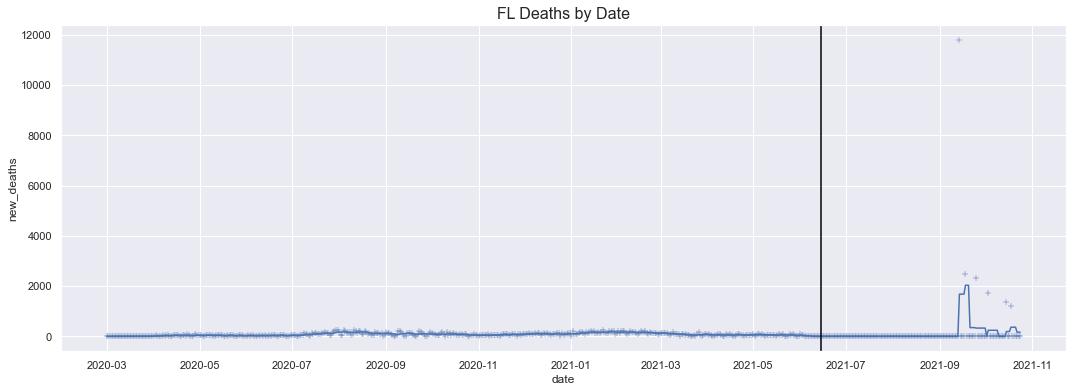

In [40]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', data=state_df[state_df['STATE'] == '12'], marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths', data=state_df[state_df['STATE'] == '12']);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'), color='black')
plt.title('FL Deaths by Date', fontsize=16);
plt.show()

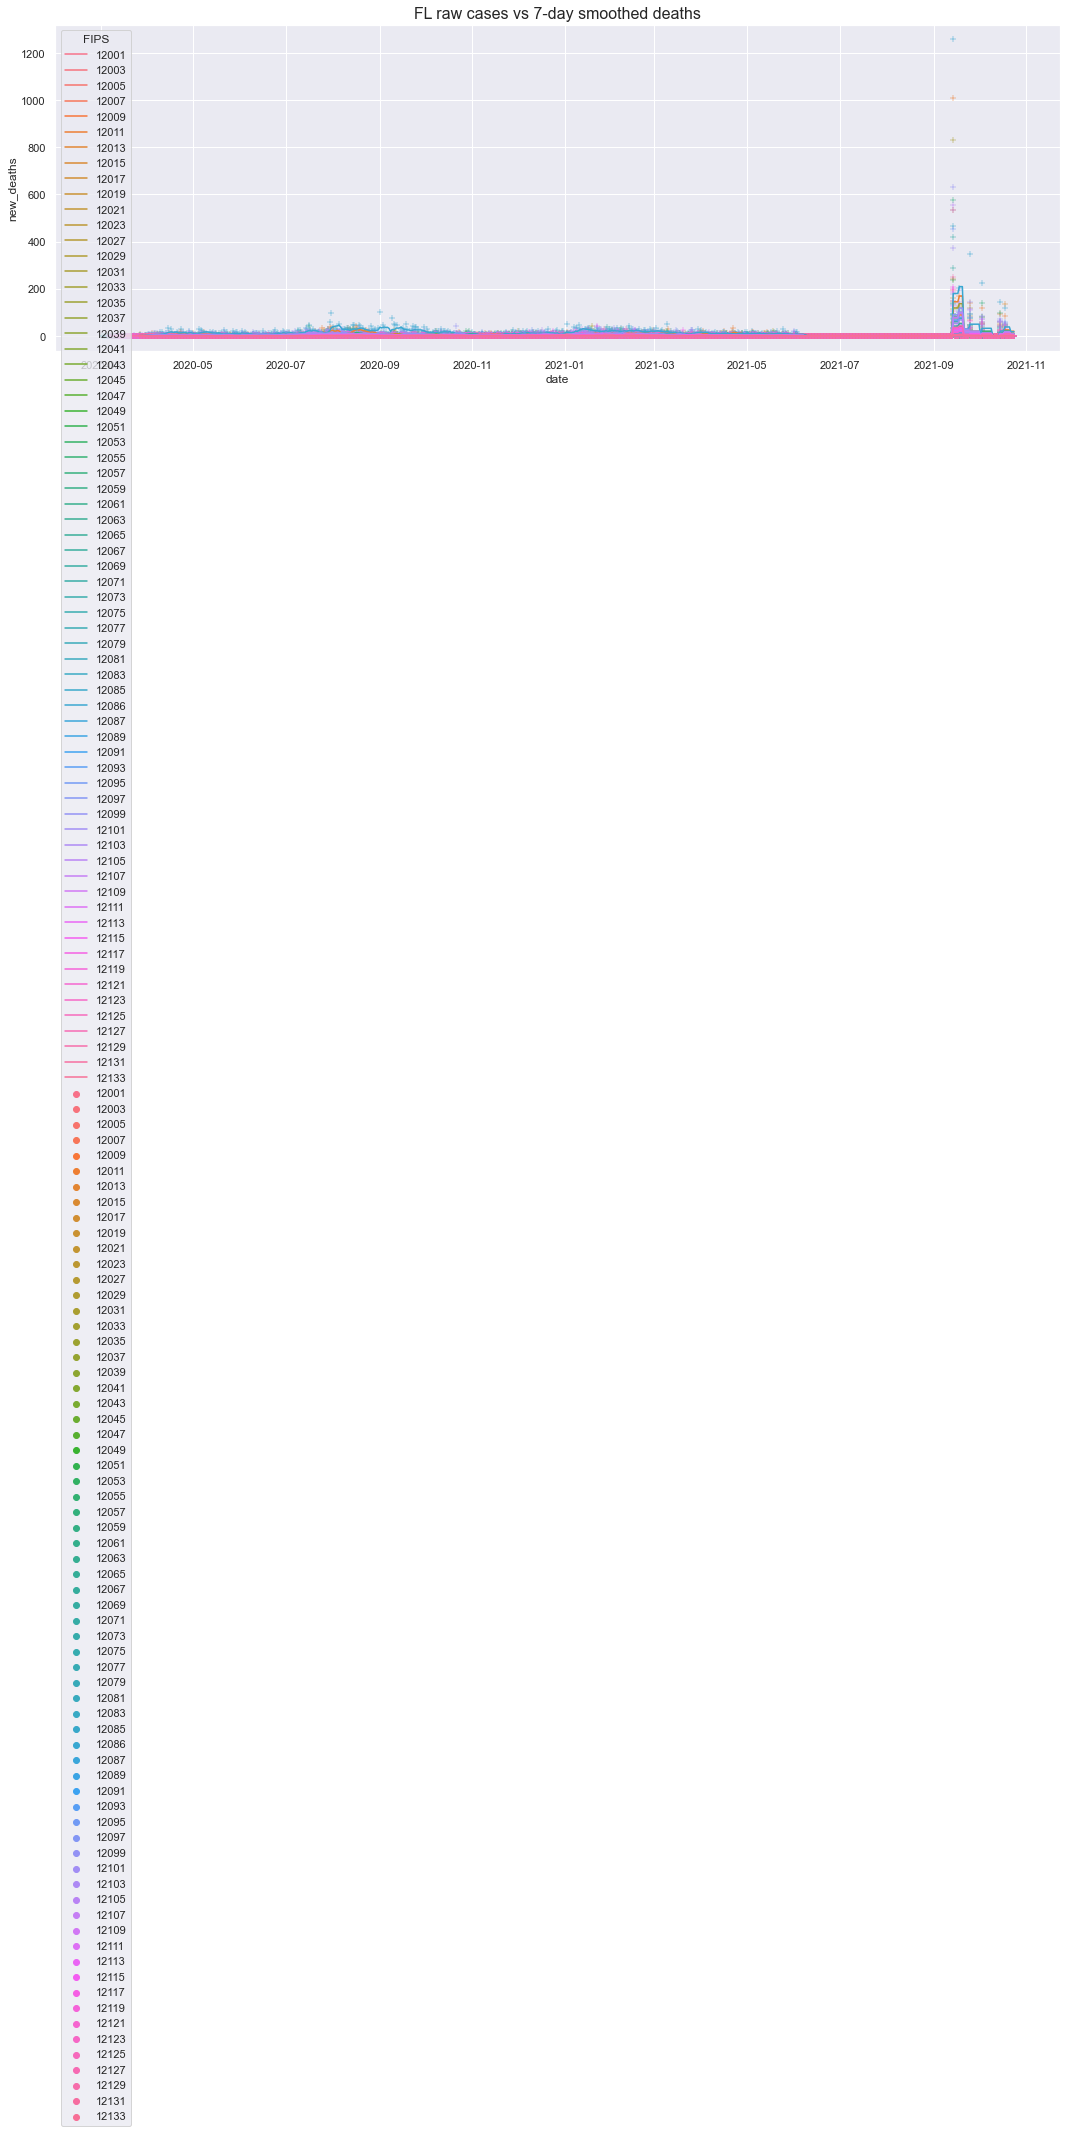

In [42]:
cd_only_fl = cd_df[(cd_df['FIPS'].apply(lambda x: x[:2] == '12'))]
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', data=cd_only_fl, hue='FIPS', marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths', data=cd_only_fl, hue='FIPS');
plt.title('FL raw cases vs 7-day smoothed deaths', fontsize=16);
plt.show()


In [43]:
cd_only_fl[cd_only_fl['new_deaths'] > 1000]

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
5855,12011,2021-09-14,336741,4090.0,336741.0,0.0,1008.428571,1263.571429,1263.571429,1263.571429,3079.0,1011.0,144.428571,0.0,0.0,0.0
27369,12086,2021-09-14,642199,7730.0,642199.0,0.0,1374.285714,1725.714286,1725.714286,1725.714286,6472.0,1258.0,179.714286,0.0,0.0,0.0


In [48]:
date_mask = (cd_only_fl['date'] > '2021-09-01') & (cd_only_fl['date'] < '2021-09-25')
cd_only_fl[date_mask & (cd_only_fl['FIPS'] == '12011')][['FIPS','date', 'deaths', 'previous_day_deaths', 'new_deaths', 'smoothed_new_deaths']].head(20)

,FIPS,date,deaths,previous_day_deaths,new_deaths,smoothed_new_deaths
5843,12011,2021-09-02,3079.0,3079.0,0.0,0.000000
5844,12011,2021-09-03,3079.0,3079.0,0.0,0.000000
5845,12011,2021-09-04,3079.0,3079.0,0.0,0.000000
5846,12011,2021-09-05,3079.0,3079.0,0.0,0.000000
5847,12011,2021-09-06,3079.0,3079.0,0.0,0.000000
5848,12011,2021-09-07,3079.0,3079.0,0.0,0.000000
5849,12011,2021-09-08,3079.0,3079.0,0.0,0.000000
5850,12011,2021-09-09,3079.0,3079.0,0.0,0.000000
5851,12011,2021-09-10,3079.0,3079.0,0.0,0.000000
5852,12011,2021-09-11,3079.0,3079.0,0.0,0.000000


In [61]:
raw_df = pd.read_csv('data/cases_and_deaths/us-counties.csv',
                    dtype={'fips':str})

In [62]:
raw_df['date'] = raw_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [63]:
raw_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0.0
1,2020-01-22,Snohomish,Washington,53061,1,0.0
2,2020-01-23,Snohomish,Washington,53061,1,0.0
3,2020-01-24,Cook,Illinois,17031,1,0.0
4,2020-01-24,Snohomish,Washington,53061,1,0.0


In [66]:
raw_df.dtypes

date      datetime64[ns]
county            object
state             object
fips              object
cases              int64
deaths           float64
dtype: object

In [67]:
date_mask = (raw_df['date'] > '2021-08-10') & (raw_df['date'] < '2021-09-25')


In [68]:
raw_df[(raw_df['fips'] == '12086') & date_mask].head(50)

,date,county,state,fips,cases,deaths
1605815,2021-08-11,Miami-Dade,Florida,12086,562190,6472.0
1609064,2021-08-12,Miami-Dade,Florida,12086,562190,6472.0
1612312,2021-08-13,Miami-Dade,Florida,12086,583845,6472.0
1615561,2021-08-14,Miami-Dade,Florida,12086,583845,6472.0
1618809,2021-08-15,Miami-Dade,Florida,12086,583845,6472.0
1622056,2021-08-16,Miami-Dade,Florida,12086,583845,6472.0
1625303,2021-08-17,Miami-Dade,Florida,12086,583845,6472.0
1628550,2021-08-18,Miami-Dade,Florida,12086,583845,6472.0
1631797,2021-08-19,Miami-Dade,Florida,12086,583845,6472.0
1635046,2021-08-20,Miami-Dade,Florida,12086,603878,6472.0


In [54]:
date_mask = (cd_only_fl['date'] > '2021-08-10') & (cd_only_fl['date'] < '2021-09-25')
cd_only_fl[date_mask & (cd_only_fl['FIPS'] == '12086')][['FIPS','date', 'deaths', 'previous_day_deaths', 'new_deaths', 'smoothed_new_deaths']].head(50)


,FIPS,date,deaths,previous_day_deaths,new_deaths,smoothed_new_deaths
27335,12086,2021-08-11,6472.0,6472.0,0.0,0.000000
27336,12086,2021-08-12,6472.0,6472.0,0.0,0.000000
27337,12086,2021-08-13,6472.0,6472.0,0.0,0.000000
27338,12086,2021-08-14,6472.0,6472.0,0.0,0.000000
27339,12086,2021-08-15,6472.0,6472.0,0.0,0.000000
27340,12086,2021-08-16,6472.0,6472.0,0.0,0.000000
27341,12086,2021-08-17,6472.0,6472.0,0.0,0.000000
27342,12086,2021-08-18,6472.0,6472.0,0.0,0.000000
27343,12086,2021-08-19,6472.0,6472.0,0.0,0.000000
27344,12086,2021-08-20,6472.0,6472.0,0.0,0.000000


### Creating logic for smoothing + feature addition

In [16]:
df = df.sort_values(['FIPS','date'])
df = df.set_index(['FIPS', 'date'], drop=True)

NameError: name 'df' is not defined

In [ ]:
df['previous_day_cases'] = df.groupby(['FIPS'], as_index=False)[['cases']].shift(periods=1)
df['new_cases'] = df['cases'] - df['previous_day_cases']
df['new_cases'] = df['new_cases'].apply(lambda x: max(0, x))

In [ ]:
test = df.groupby(['FIPS'], as_index=False)['new_cases'].rolling(7).mean().reset_index(drop=True)
test.head(10)

In [ ]:
df = df.reset_index()
df['rolling_new_cases'] = df.groupby(['FIPS'], as_index=False)['new_cases'].rolling(7).mean().reset_index(drop=True).fillna(0)
df['rolling_cases'] = df.groupby(['FIPS'], as_index=False)['cases'].rolling(7).mean().reset_index(drop=True).fillna(0)

In [ ]:
df[['cases', 'previous_day_cases', 'new_cases', 'rolling_cases', 'rolling_new_cases']].head(10)

In [ ]:
single_county_df = df[df['FIPS'] == '12011']

In [ ]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='cases', data=single_county_df, color='none', edgecolor='b');
sns.lineplot(x='date', y='rolling_cases', data=single_county_df, color='r');
plt.title('Cumulative cases vs Rolling avg of cases', fontsize=16);
plt.show()

plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_cases', data=single_county_df, color='none', edgecolor='b');
sns.lineplot(x='date', y='rolling_new_cases', data=single_county_df, color='r');
plt.title('New cases vs Rolling avg of new cases', fontsize=16);
plt.show()

In [ ]:
df_12011[df_12011['date'] > '2020-12-29'][['date', 'cases', 'previous_day_cases','rolling_cases', 'new_cases', 'rolling_new_cases']].head(10)

In [ ]:
140110-137610

In [ ]:
np.mean([1456, 1572, 0, 2500, 900, 983, 1193])

In [ ]:
## Setting cases 8, 9, 10 days prior
# df = df.sort_values(['FIPS','date'])
# df = df.set_index(['FIPS', 'date'], drop=True)

In [ ]:
df['8_days_prior_cases'] = df.groupby(['FIPS'], as_index=False)[['rolling_new_cases']].shift(periods=8).fillna(0)
df['9_days_prior_cases'] = df.groupby(['FIPS'], as_index=False)[['rolling_new_cases']].shift(periods=9).fillna(0)
df['10_days_prior_cases'] = df.groupby(['FIPS'], as_index=False)[['rolling_new_cases']].shift(periods=10).fillna(0)

In [ ]:
single_county_df[single_county_df['date'] > '2020-12-29'][['date', 'cases', 'previous_day_cases','rolling_cases', 'new_cases', 'rolling_new_cases', '8_days_prior_cases', '9_days_prior_cases', '10_days_prior_cases']].head(10)


In [ ]:
single_county_df[['date', 'cases', 'previous_day_cases','rolling_cases', 'new_cases', 'rolling_new_cases', '8_days_prior_cases', '9_days_prior_cases', '10_days_prior_cases']].head(10)
